In [2]:
# Équivalent des librairies R en Python
import pandas as pd                 # tidyverse (dplyr, tidyr)
import numpy as np                 # tidyverse (fonctions numériques)
import seaborn as sns              # tidyverse (ggplot2)
import matplotlib.pyplot as plt    # tidyverse (visualisation)
from bs4 import BeautifulSoup      # rvest (web scraping)
import requests                    # rvest (requêtes HTTP)
import re                          # rebus (expressions régulières)
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from tabulate import tabulate

In [4]:



link = "https://www.footmercato.net/angleterre/premier-league/classement"
html = requests.get(link).content
soup = BeautifulSoup(html, 'html.parser')

# Vérifiez s'il y a des nœuds de table
table_node = soup.find_all('table')

if len(table_node) > 0:
    # Extraire le contenu de la table
    table_content = pd.read_html(str(table_node[0]), header=0)[0]
    
    # Vérifiez et corrigez les noms des colonnes si nécessaire
    table_content.columns = table_content.columns.str.replace('[^A-Za-z0-9]+', 'E', regex=True)
    
    print(table_content)
else:
    print("No table nodes found in the HTML.")

     E          Equipe  Pts   J  DIF   G   N   D  BP  BC
0    1       Liverpool   79  33   44  24   7   2  75  31
1    2         Arsenal   66  33   34  18  12   3  61  27
2    3       Newcastle   59  33   18  18   5  10  62  44
3    4        Man City   58  33   22  17   7   9  64  42
4    5         Chelsea   57  33   18  16   9   8  58  40
5    6      Nottingham   57  32   13  17   6   9  51  38
6    7     Aston Villa   57  33    6  16   9   8  53  47
7    8     Bournemouth   49  33   12  13  10  10  52  40
8    9          Fulham   48  33    3  13   9  11  48  45
9   10        Brighton   48  33    0  12  12   9  53  53
10  11       Brentford   46  33    6  13   7  13  56  50
11  12  Crystal Palace   44  33   -4  11  11  11  41  45
12  13         Everton   38  33   -6   8  14  11  34  40
13  14      Man United   38  33   -8  10   8  15  38  46
14  15   Wolverhampton   38  33  -13  11   5  17  48  61
15  16       Tottenham   37  32   11  11   4  17  60  49
16  17        West Ham   36  33

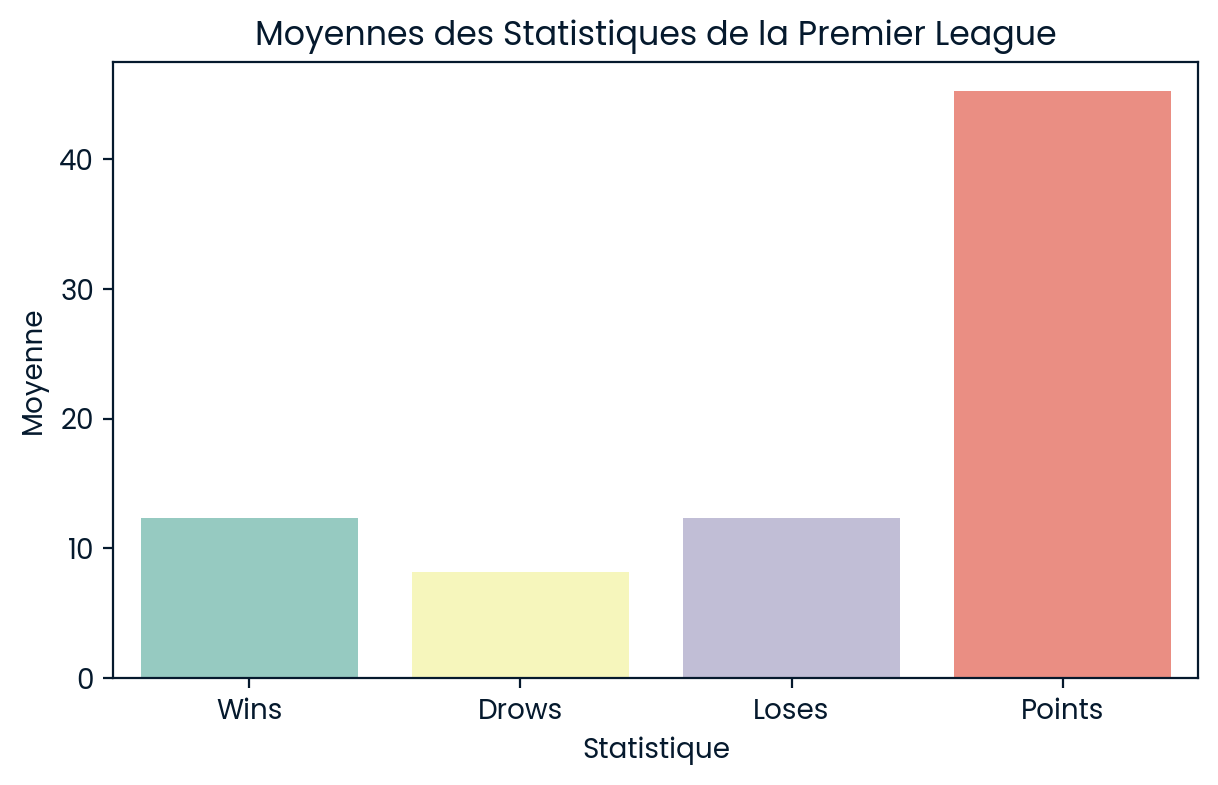

In [5]:
# Calculer les moyennes
moyenne_wins = table_content['G'].mean()
moyenne_drows = table_content['N'].mean()
moyenne_loses = table_content['D'].mean()
moyenne_pts = table_content['Pts'].mean()

# Créer un dataframe pour les moyennes
moyennes_df = pd.DataFrame({
    'Statistique': ['Wins', 'Drows', 'Loses', 'Points'],
    'Moyenne': [moyenne_wins, moyenne_drows, moyenne_loses, moyenne_pts]
})

# Afficher les résultats en courbe avec une palette de couleur
plt.figure(figsize=(7, 4))
sns.barplot(data=moyennes_df, x='Statistique', y='Moyenne', hue='Statistique', 
            palette='Set3', dodge=False)

plt.title('Moyennes des Statistiques de la Premier League')
plt.xlabel('Statistique')
plt.ylabel('Moyenne')
sns.set_style('whitegrid')  # Équivalent de theme_minimal()
plt.show()

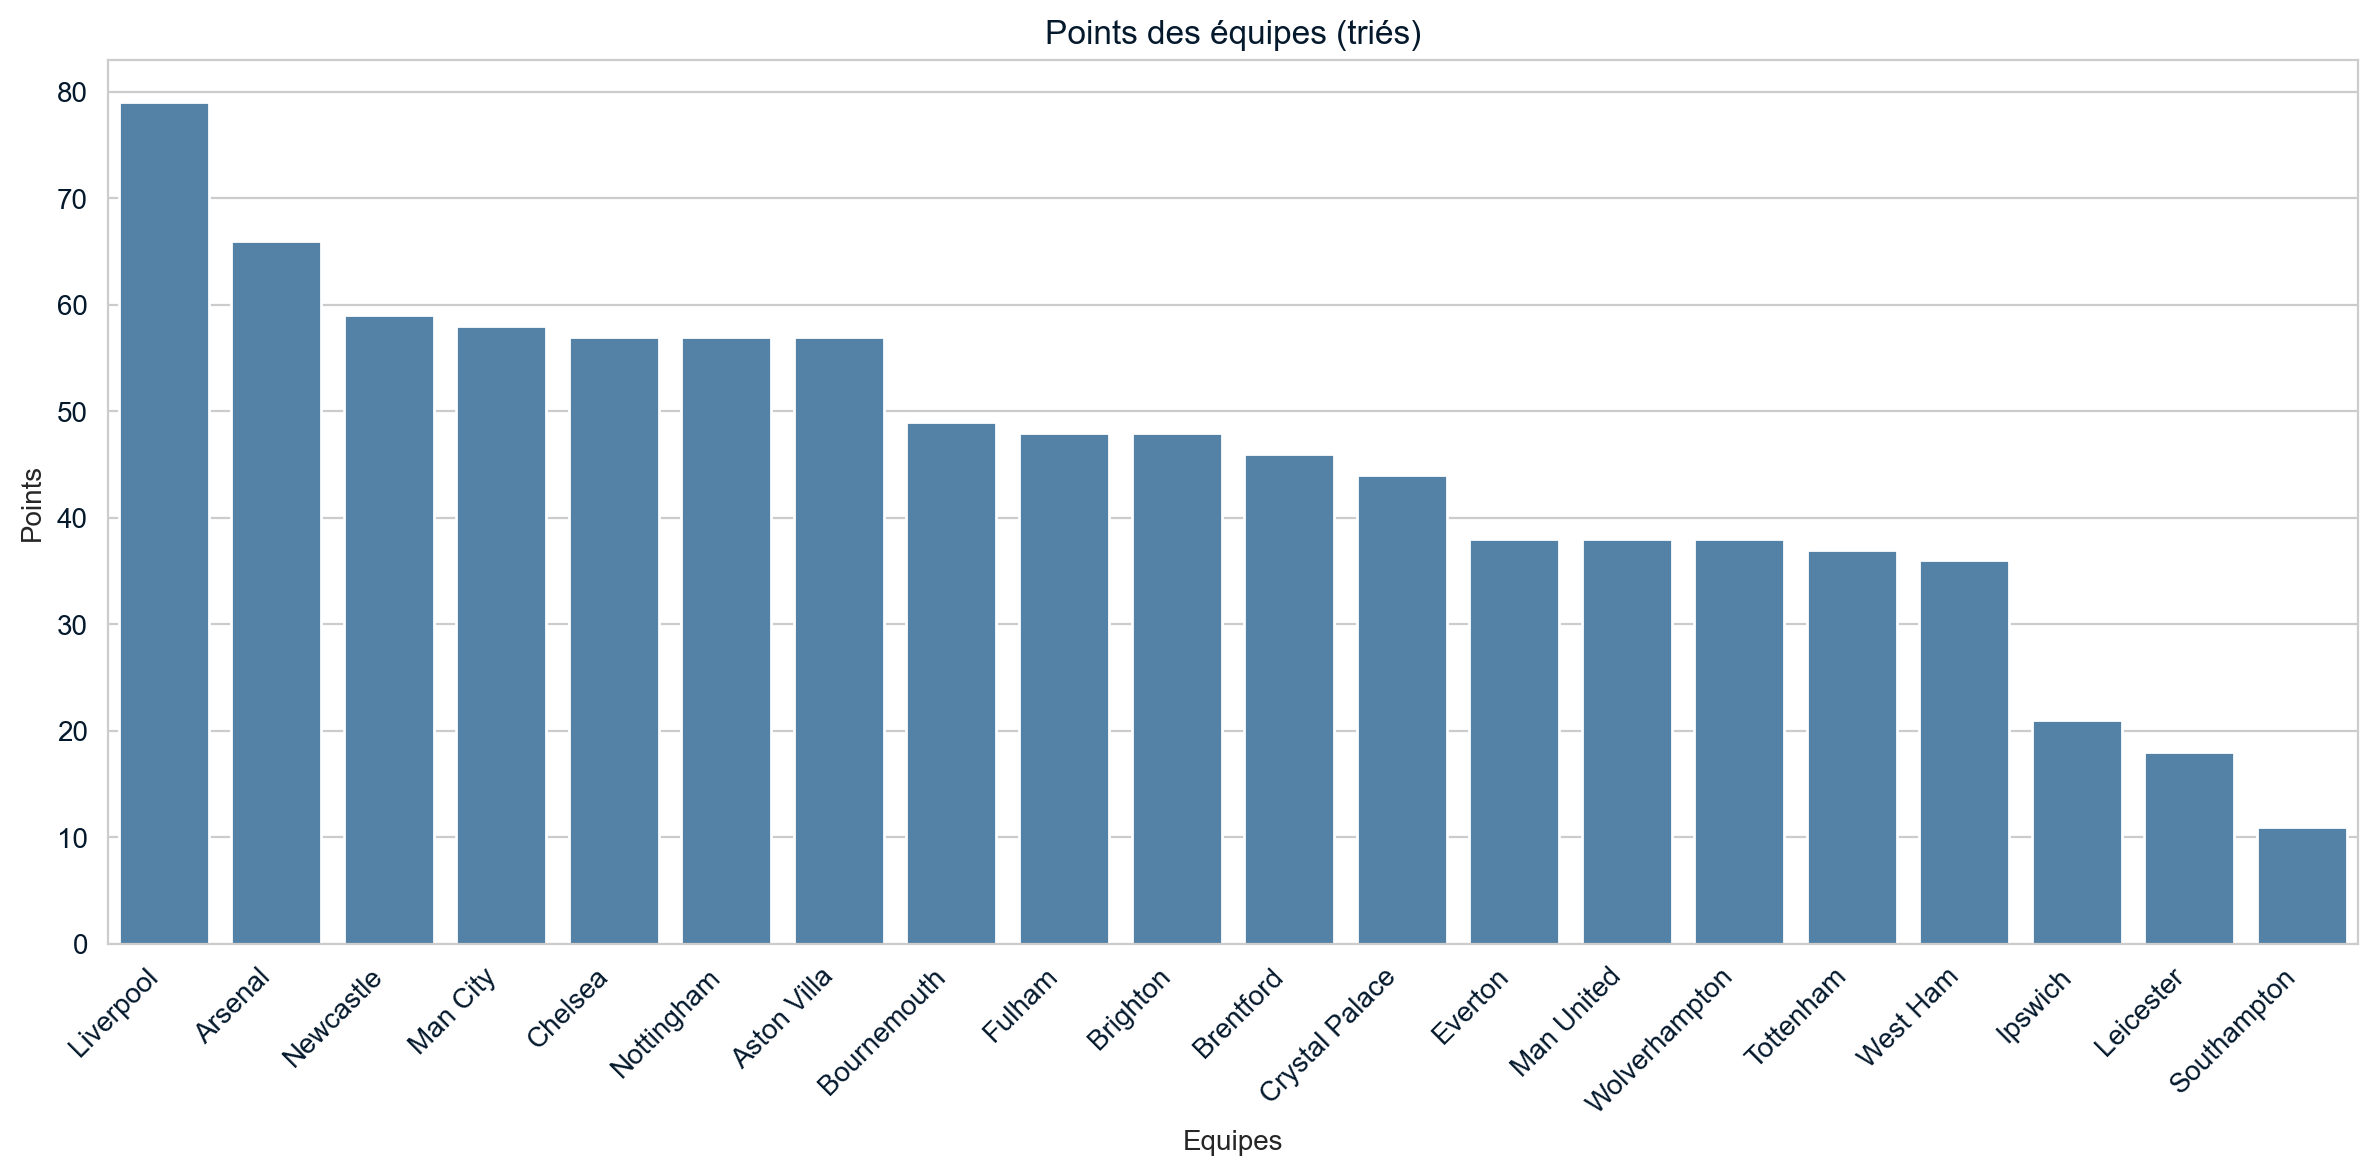

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=table_content, 
            x='Equipe', 
            y='Pts',
            order=table_content.sort_values('Pts', ascending=False)['Equipe'],
            color='steelblue')

plt.title('Points des équipes (triés)')
plt.xlabel('Equipes')
plt.ylabel('Points')
plt.xticks(rotation=45, ha='right')
sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

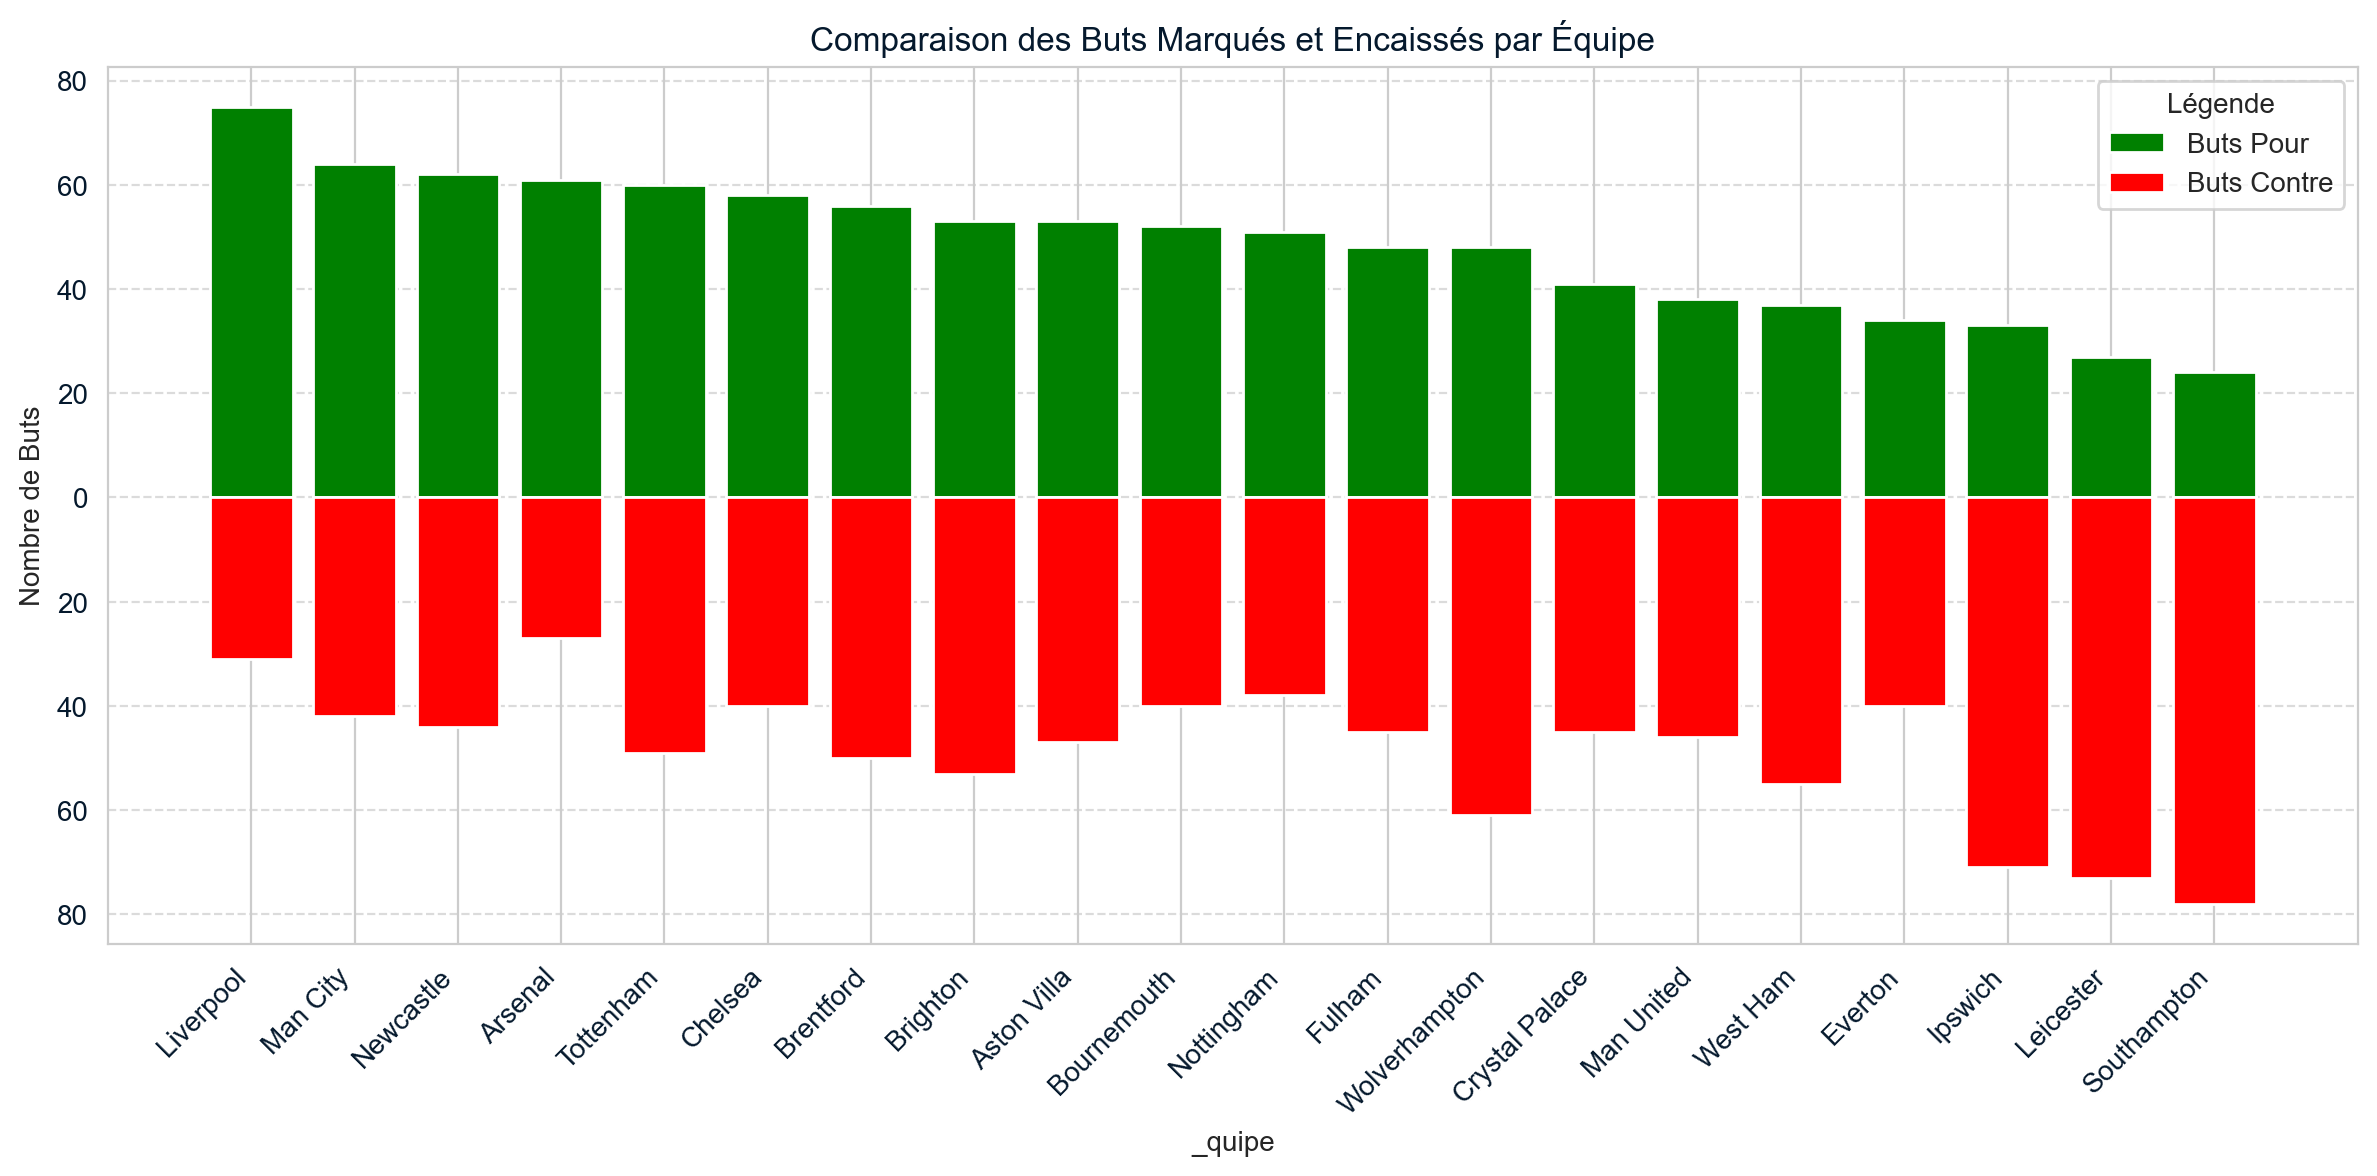

In [8]:
# Trier les équipes par BP (Buts Pour)
table_content_sorted = table_content.sort_values('BP', ascending=False)

plt.figure(figsize=(12, 6))

# Barres pour Buts Pour (BP)
plt.bar(table_content_sorted['Equipe'], 
        table_content_sorted['BP'], 
        color='green', 
        label='Buts Pour')

# Barres pour Buts Contre (BC) - affichés vers le bas
plt.bar(table_content_sorted['Equipe'], 
        -table_content_sorted['BC'], 
        color='red', 
        label='Buts Contre')

plt.title('Comparaison des Buts Marqués et Encaissés par Équipe')
plt.xlabel('_quipe')
plt.ylabel('Nombre de Buts')
plt.xticks(rotation=45, ha='right')

# Ajuster l'axe Y pour afficher les valeurs absolues
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: abs(int(x))))

plt.legend(title='Légende')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
# Assuming 'premieres_equipes' is a DataFrame that needs to be defined
import pandas as pd
from tabulate import tabulate

# Sample data for 'premieres_equipes'
data = {
    'Equipe': ['Team A', 'Team B', 'Team C', 'Team D'],
    'Pts': [85, 78, 76, 74],
    'BP': [70, 65, 60, 55],
    'BC': [30, 35, 40, 45]
}

premieres_equipes = pd.DataFrame(data)

# Afficher les équipes qui vont jouer en Champions League saison 25/26
print(tabulate(premieres_equipes[['Equipe', 'Pts', 'BP', 'BC']], headers='keys', tablefmt='psql'))

+----+----------+-------+------+------+
|    | Equipe   |   Pts |   BP |   BC |
|----+----------+-------+------+------|
|  0 | Team A   |    85 |   70 |   30 |
|  1 | Team B   |    78 |   65 |   35 |
|  2 | Team C   |    76 |   60 |   40 |
|  3 | Team D   |    74 |   55 |   45 |
+----+----------+-------+------+------+


In [10]:
max_buts = table_content['BP'].max()
equipe_max = table_content.loc[table_content['BP'] == max_buts, 'Equipe'].values[0]
print(f"L'équipe avec le plus de buts marquées est {equipe_max} avec {max_buts} buts")

L'équipe avec le plus de buts marquées est Liverpool avec 75 buts


In [11]:
max_bc = table_content['BC'].max()
equipe_max_contre = table_content[table_content['BC'] == max_bc]['Equipe'].iloc[0]
print(f"L'équipe ayant encaissé le plus de buts est {equipe_max_contre} avec {max_bc} buts contre")

L'équipe ayant encaissé le plus de buts est Southampton avec 78 buts contre


In [12]:
derniers_equipes = table_content.tail(3)
print(tabulate(derniers_equipes[['Equipe', 'Pts', 'J']], 
               headers=['Equipe', 'Points', 'Matches'], 
               tablefmt='grid'))

+----+-------------+----------+-----------+
|    | Equipe      |   Points |   Matches |
+====+=============+==========+===========+
| 17 | Ipswich     |       21 |        33 |
+----+-------------+----------+-----------+
| 18 | Leicester   |       18 |        33 |
+----+-------------+----------+-----------+
| 19 | Southampton |       11 |        33 |
+----+-------------+----------+-----------+


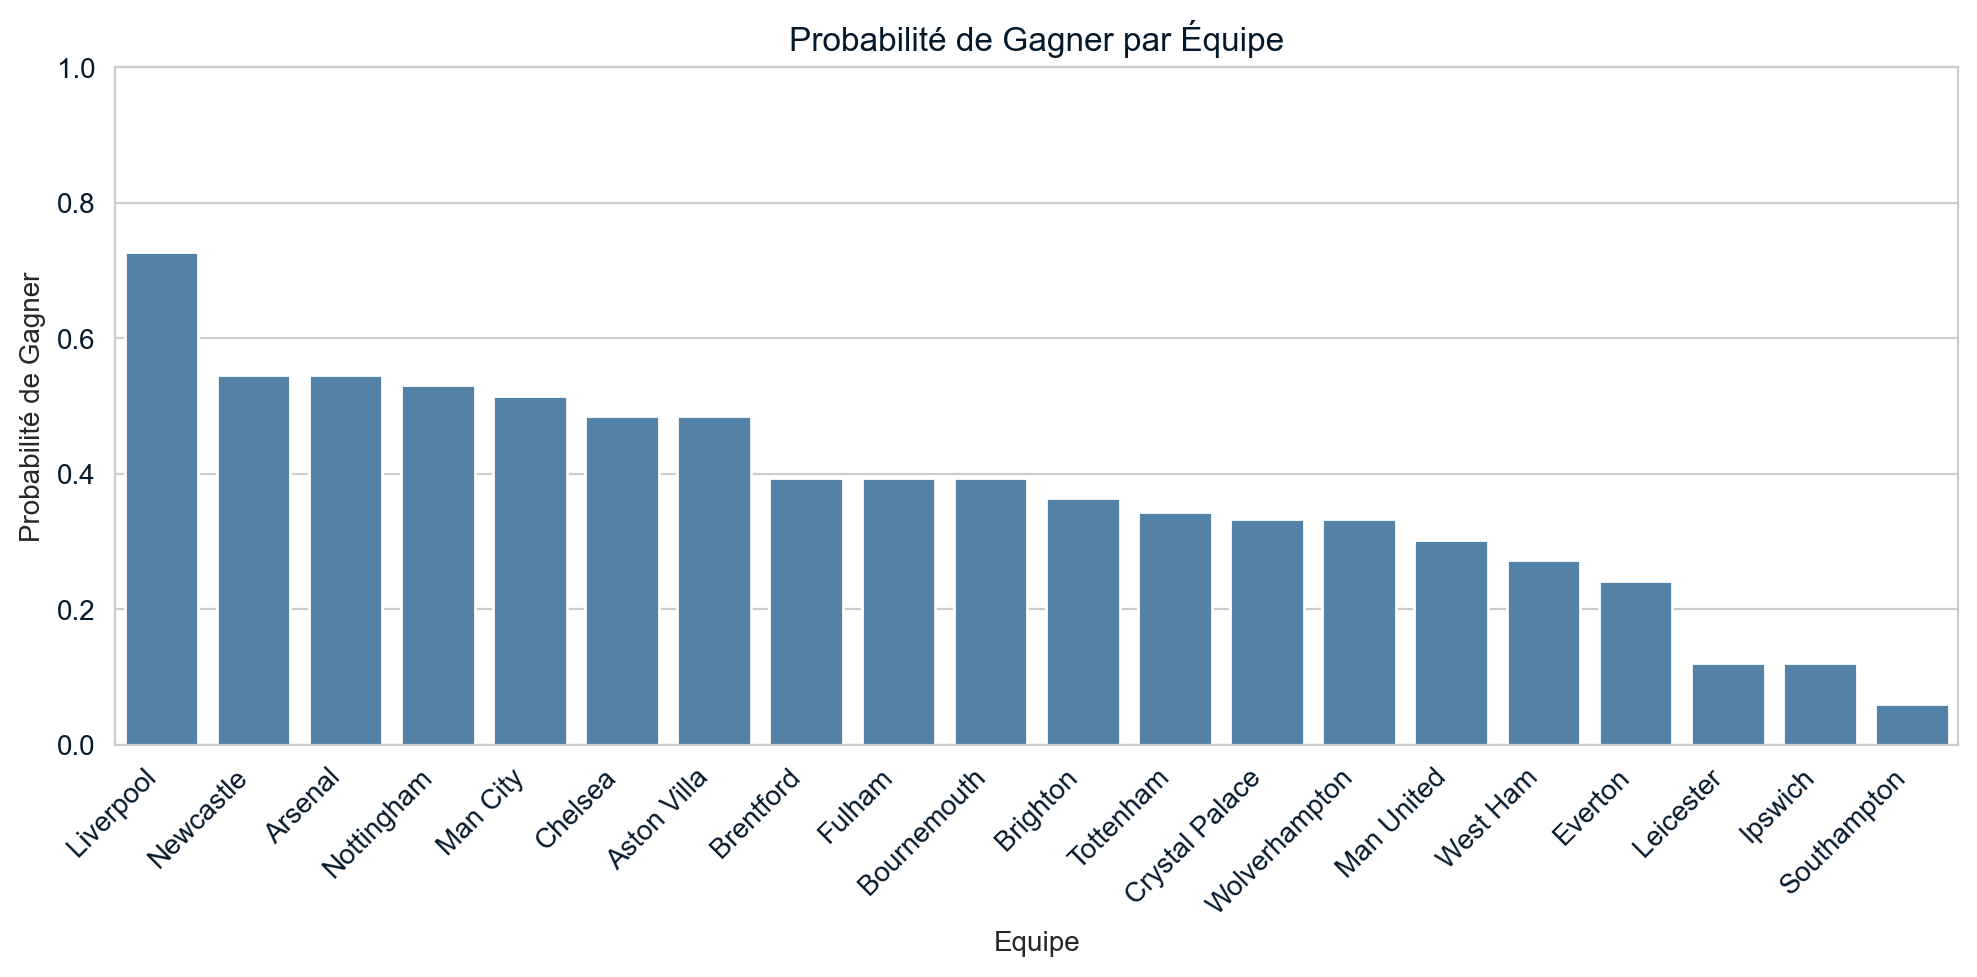

In [25]:
# Calculer la probabilité de gagner
table_content['Probabilite_Gagner'] = table_content['G'] / (table_content['G'] + table_content['D'] + table_content['N'])

# Trier par probabilité décroissante
table_content = table_content.sort_values('Probabilite_Gagner', ascending=False)

# Afficher le graphique
plt.figure(figsize=(10, 5))
sns.barplot(data=table_content, 
            x='Equipe', 
            y='Probabilite_Gagner',
            order=table_content['Equipe'],
            color='steelblue')

plt.title('Probabilité de Gagner par Équipe')
plt.xlabel('Equipe')
plt.ylabel('Probabilité de Gagner')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Pour afficher de 0% à 100%
sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

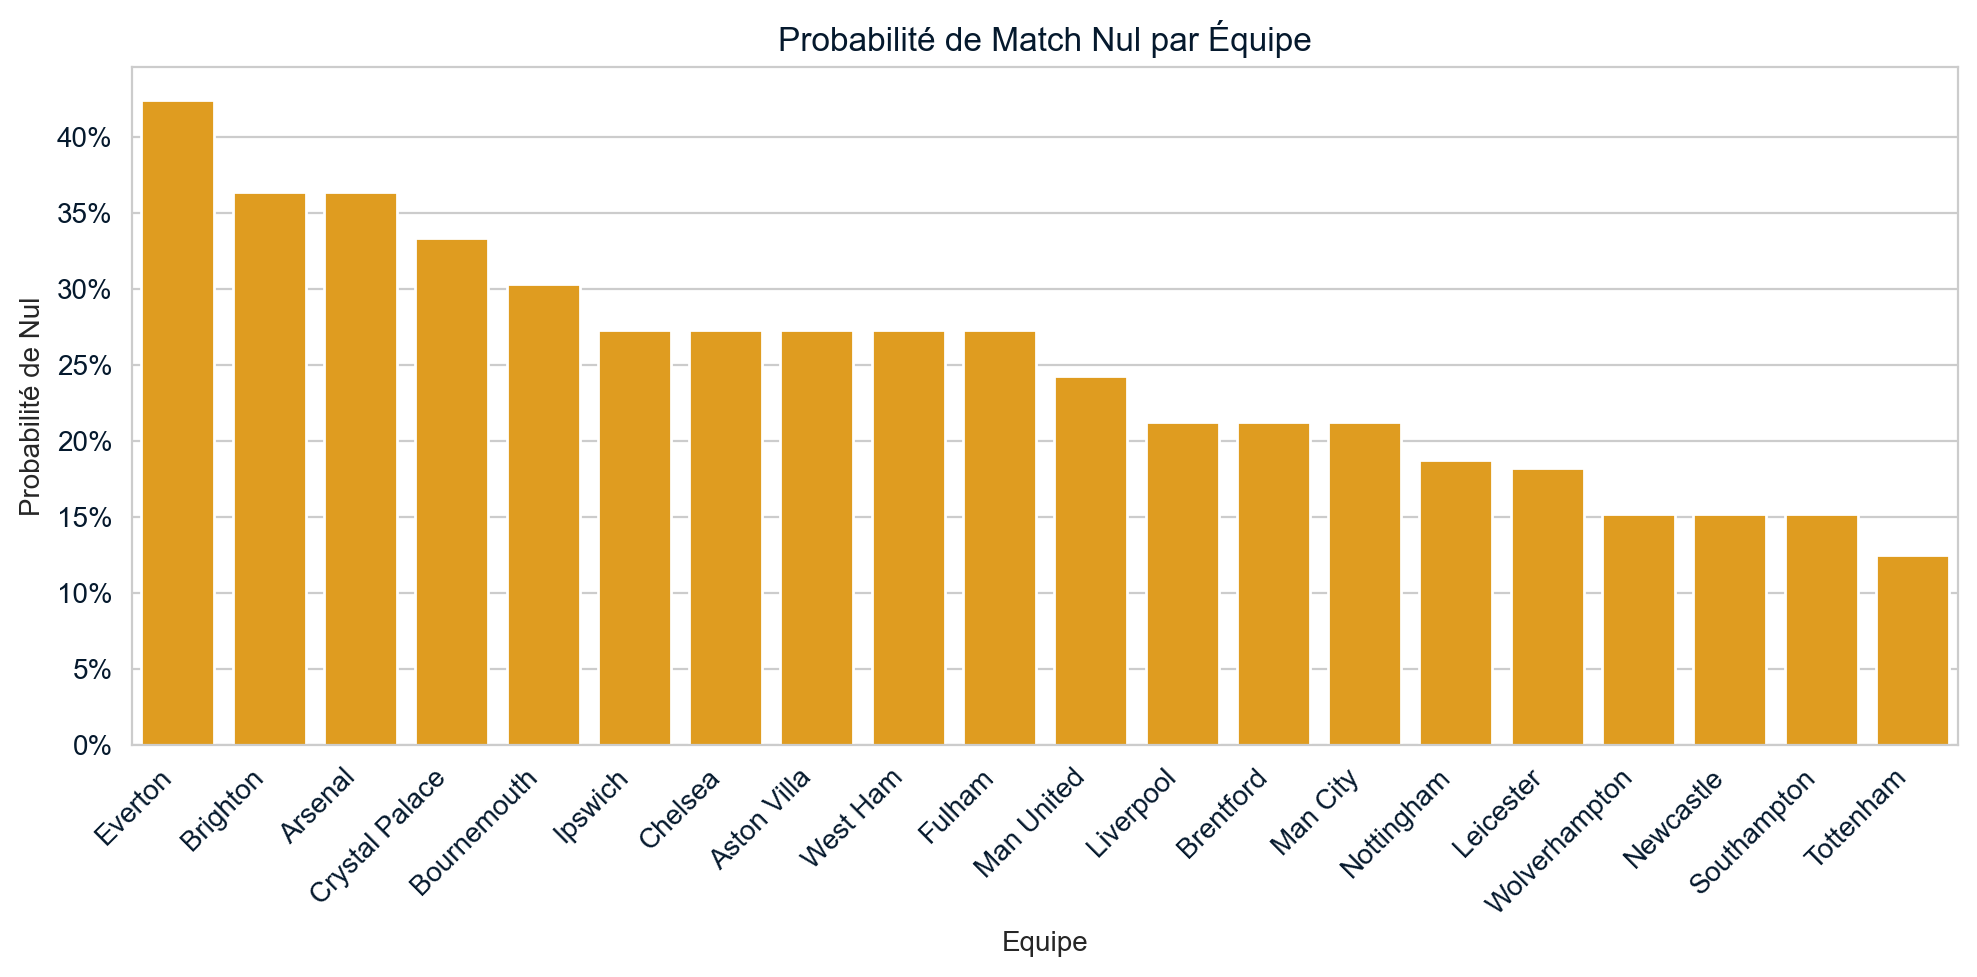

In [26]:
# Calculer la probabilité de match nul
table_content['Probabilite_Null'] = table_content['N'] / (table_content['G'] + table_content['D'] + table_content['N'])

# Trier par probabilité décroissante
table_content = table_content.sort_values('Probabilite_Null', ascending=False)

# Créer le graphique
plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=table_content,
    x='Equipe',
    y='Probabilite_Null',
    color='orange'  # Couleur différente pour les nuls
)

# Personnalisation du graphique
plt.title('Probabilité de Match Nul par Équipe')
plt.xlabel('Equipe')
plt.ylabel('Probabilité de Nul')
plt.xticks(rotation=45, ha='right')

# Formater l'axe Y en pourcentages
barplot.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

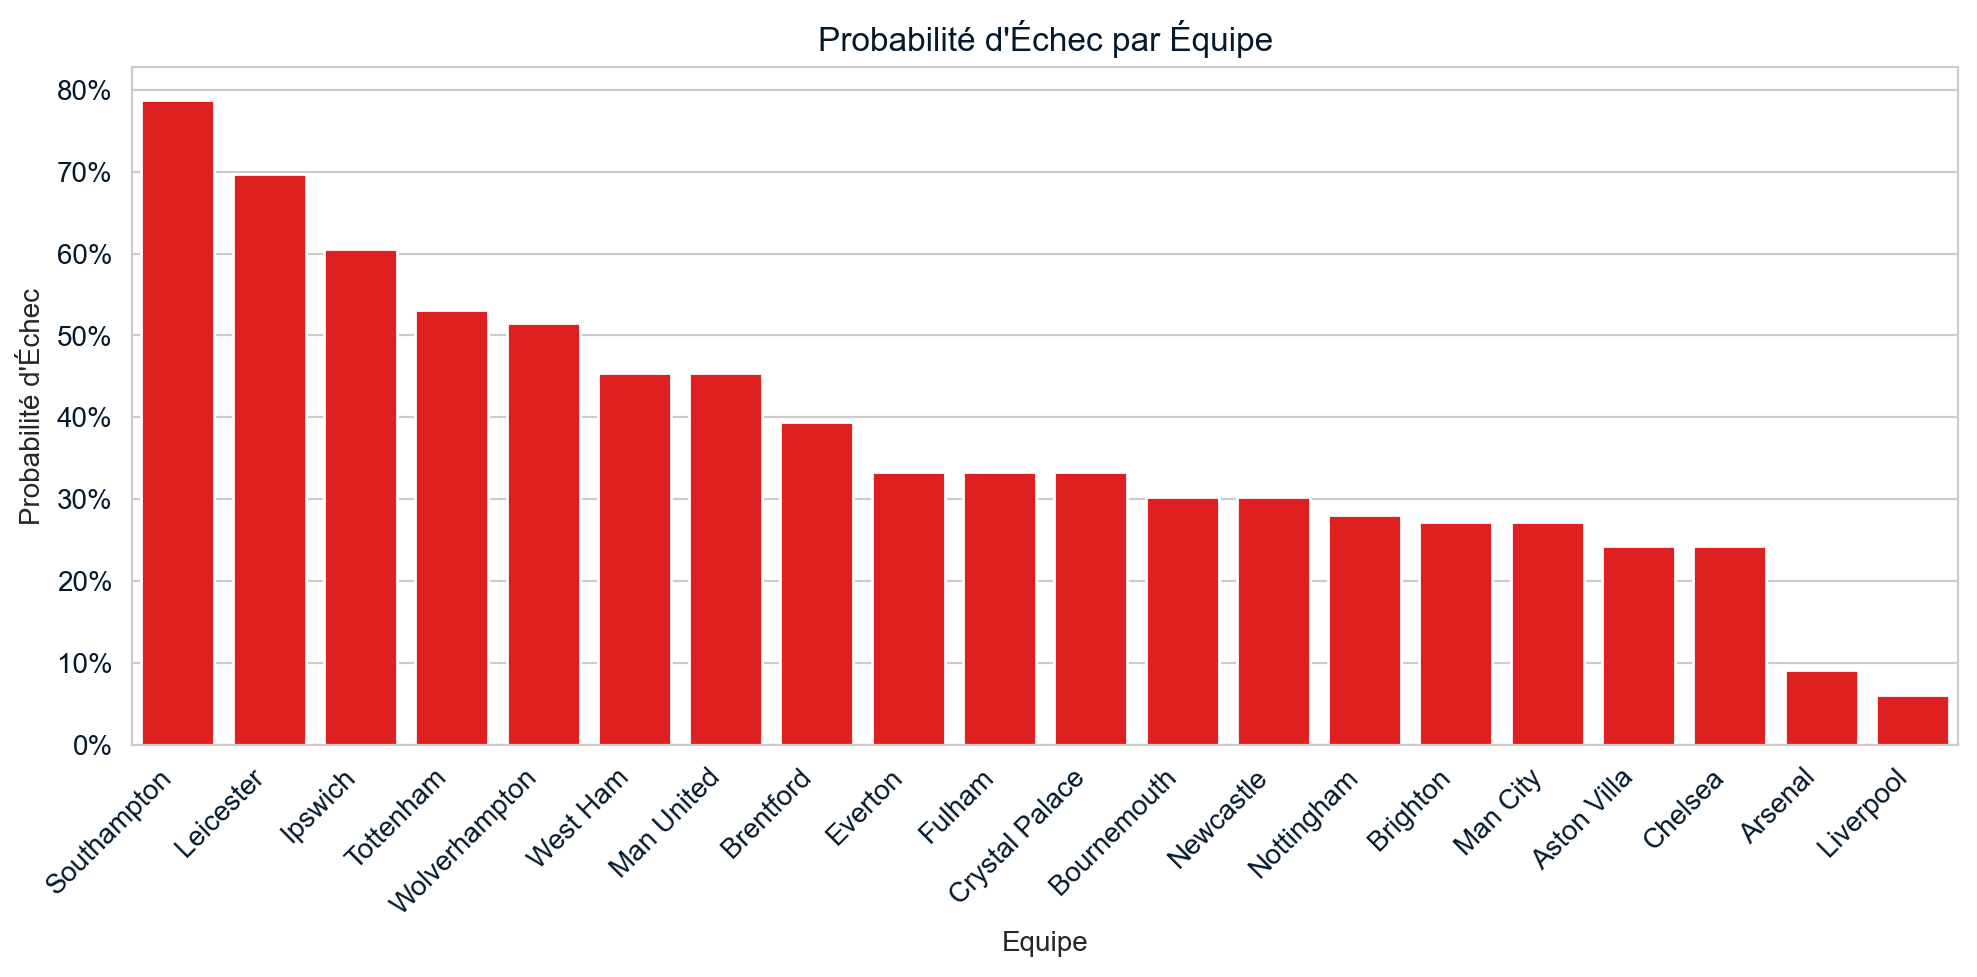

In [24]:
# Calculer la probabilité d'échec (défaites)
table_content['Probabilite_Echec'] = table_content['D'] / (table_content['G'] + table_content['D'] + table_content['N'])

# Trier par probabilité décroissante
table_content = table_content.sort_values('Probabilite_Echec', ascending=False)

# Créer le graphique
plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=table_content,
    x='Equipe',
    y='Probabilite_Echec',
    color='red'  # Couleur rouge pour les défaites
)

# Personnalisation du graphique
plt.title("Probabilité d'Échec par Équipe")
plt.xlabel('Equipe')
plt.ylabel("Probabilité d'Échec")
plt.xticks(rotation=45, ha='right')

# Formater l'axe Y en pourcentages
barplot.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

